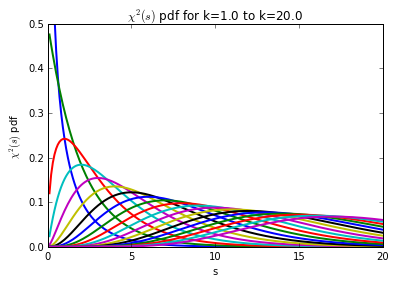

In [4]:
##Part to generate the Chi^2 Probability Distribution Function (PDF) for a given number of degrees of freedom (Ndof)

import math
import numpy as np
import matplotlib.pyplot as plt

##creation of tab_x : the array for the values for the Chi^2 (so the abscisse) from xmin to xmax with nbp points

nbp=200
xmin=0.1
xmax=20.

tab_x = np.linspace(xmin,xmax,nbp)

##creation of tabk : the array for the Ndof values from kmin to kmax

kmin=1.
kmax=20.  
tabk =  np.arange(kmin,kmax,1.)


##Test for the gamma function

val_gamma = np.zeros(nbp)
for i in range(len(tab_x)):  
    #print i
    val_gamma[i] = math.gamma(tab_x[i])



for k in tabk:
    tab_chi2 = (1./2.)**(k/2.)/(math.gamma(k/2.))*np.exp(-tab_x/2.)*tab_x**(k/2.-1)
    plt.plot(tab_x, tab_chi2, linewidth=2)
    #print sum(tab_chi2*((xmax-xmin)/nbp))
plt.axis([0,xmax,0,0.5])
plt.title('$\chi^2(s)$ pdf for k='+str(kmin)+' to k='+str(kmax))
plt.xlabel('s')
plt.ylabel('$\chi^2(s)$ pdf')
plt.show()





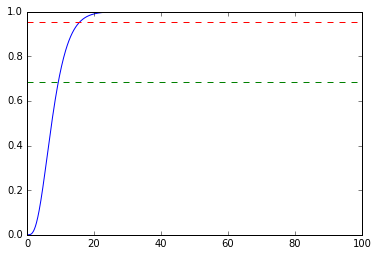

Cut values for 1, 2 and 3 sigma for Ndof=8
Value for 1 sigma= 9.3
Value for 2 sigma= 15.8
Value for 3 sigma= 23.6


In [18]:
##Part to calculate the levels for the contours
##We have to use the cumulative distribution function which is given by gammainc(k/2, s/2)/gamma(k/2)
## BUT!!!!!! In scipy the definition of scipy.special.gammainc is directly this ratio so we just have to use it without to divide
import numpy as np
import scipy as sp
import math as mt
from scipy.special import erf
import matplotlib.pyplot as plt
%matplotlib inline


###




tab_val = np.linspace(0.1,100, 1000)
tab_cumul = np.zeros(len(tab_val))


Ndof = 8


for i in range(len(tab_val)):


    tab_cumul[i] = sp.special.gammainc(Ndof/2.,tab_val[i]/2)
    
plt.plot(tab_val, tab_cumul)
    
    
####Precise values for 1sigma, 2sigma and 3sigma of the gaussian
val1=0.68268949  
val2=0.95449974  
val3=0.9973002

plt.plot([0,100], [val1, val1], '--', label='$1\sigma$')
plt.plot([0,100], [val2, val2], '--', label='$2\sigma$')
plt.plot([0,100], [val3, val3], '--', label='$3\sigma$')

plt.show()

print 'Cut values for 1, 2 and 3 sigma for Ndof='+str(Ndof)
print 'Value for 1 sigma=',tab_val[np.argmin(abs(tab_cumul-val1))]
print 'Value for 2 sigma=',tab_val[np.argmin(abs(tab_cumul-val2))]
print 'Value for 3 sigma=',tab_val[np.argmin(abs(tab_cumul-val3))]



Using CAMB installed at /Users/sebinouf/Dossiers
Note: redshifts have been re-sorted (earliest first)
[ 0.53308555  0.802653  ]


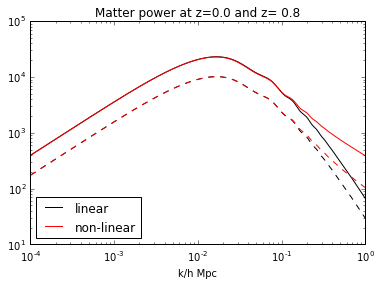

WantCls = 1
WantTransfer = 1
WantScalars = 1
WantTensors = 0
WantVectors = 0
DoLensing = 1
want_zstar = 0
want_zdrag = 0
PK_WantTransfer = 0
NonLinear = 3
Want_CMB = 1
max_l = 2500
max_l_tensor = 600
max_eta_k = 5000.0
max_eta_k_tensor = 1200.0
omegab = 0.0482853223594
omegac = 0.267764060357
omegav = 0.682534663613
omegan = 0.00141595367142
H0 = 67.5
TCMB = 2.7255
YHe = 0.245223829794
num_nu_massless = 2.03066666667
num_nu_massive = 1
nu_mass_eigenstates = 1
share_delta_neff = 0
nu_mass_degeneracies = [1.0153333333333332, 0.0, 0.0, 0.0, 0.0]
nu_mass_fractions = [1.0, 0.0, 0.0, 0.0, 0.0]
nu_mass_numbers = [1, 0, 0, 0, 0]
scalar_initial_condition = 1
OutputNormalization = 1
AccuratePolarization = 1
AccurateBB = 0
AccurateReionization = 0
MassiveNuMethod = 3
InitPower:
  tensor_parameterization = 2
  nn = 1
  an = [0.965, 1.0, 1.0, 1.0, 1.0]
  n_run = [0.0, 0.0, 0.0, 0.0, 0.0]
  n_runrun = [0.0, 0.0, 0.0, 0.0, 0.0]
  ant = [0.0, 0.0, 0.0, 0.0, 0.0]
  nt_run = [-0.0, 0.0, 0.0, 0.0, 0.0]
 

In [19]:


%matplotlib inline
import sys, platform, os
from matplotlib import pyplot as plt
import numpy as np
#uncomment this if you are running remotely and want to keep in synch with repo changes
#if platform.system()!='Windows':
#    !cd $HOME/git/camb; git pull github master; git log -1
print('Using CAMB installed at '+ os.path.realpath(os.path.join(os.getcwd(),'..')))
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
import camb
from camb import model, initialpower

#Now get matter power spectra and sigma8 at redshift 0 and 0.8
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.set_dark_energy() #re-set defaults
pars.InitPower.set_params(ns=0.965)
#Not non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0., 0.8], kmax=2.0)

#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)


print results.get_sigma8()

for i, (redshift, line) in enumerate(zip(z,['-','--'])):
    plt.loglog(kh, pk[i,:], color='k', ls = line)
    plt.loglog(kh_nonlin, pk_nonlin[i,:], color='r', ls = line)
plt.xlabel('k/h Mpc');
plt.legend(['linear','non-linear'], loc='lower left');
plt.title('Matter power at z=%s and z= %s'%tuple(z));
plt.show()

print pars

Using CAMB installed at /Users/sebinouf/Dossiers
3
Note: redshifts have been re-sorted (earliest first)
kcut_ind= 4999
kcut= 10.0
Note: redshifts have been re-sorted (earliest first)
kcut_ind= 4999
kcut= 10.0
Note: redshifts have been re-sorted (earliest first)
kcut_ind= 4999
kcut= 10.0
z= [0.0, 0.55] <type 'list'> 0.0 0.55
(0.0, 0.55)


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


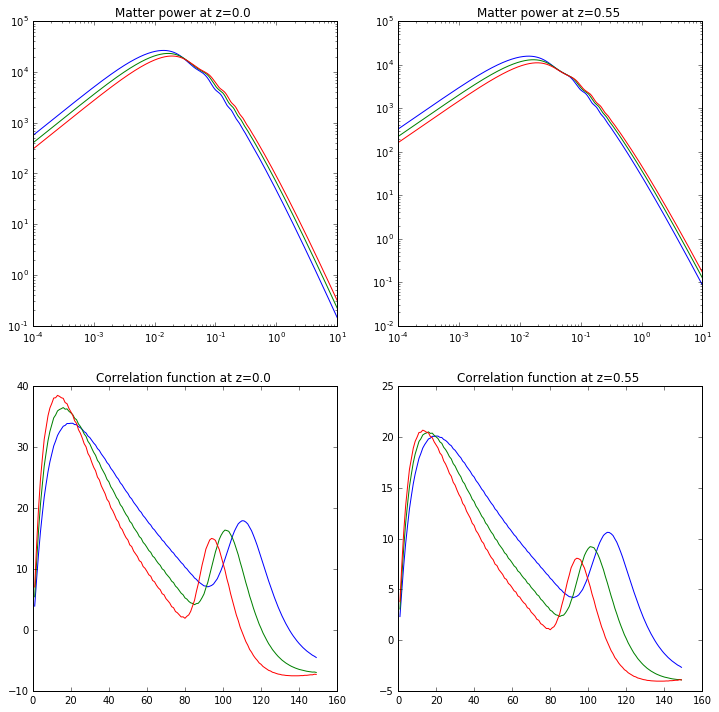

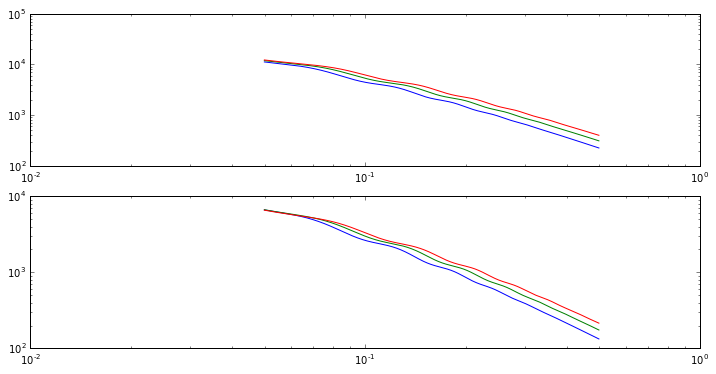

In [1]:
#Convert P(k) in \xi(r)

%matplotlib inline
import sys, platform, os
from matplotlib import pyplot as plt
import numpy as np
#uncomment this if you are running remotely and want to keep in synch with repo changes
#if platform.system()!='Windows':
#    !cd $HOME/git/camb; git pull github master; git log -1
print('Using CAMB installed at '+ os.path.realpath(os.path.join(os.getcwd(),'..')))
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
import camb
from camb import model, initialpower

import scipy.integrate as integrate
import scipy.special as special
from scipy.interpolate import interp1d


r_start = 1
r_end = 150
r_stepsize = 1
r_list = np.arange(r_start, r_end, r_stepsize)

ombh2_0 = 0.022
omch2_0 = 0.122



tab_mult = np.linspace(0.8,1.2, 3)
nb_om = len(tab_mult)

print nb_om



fig, ax = plt.subplots(2,2, figsize=(12,12))
fig2, ax2 = plt.subplots(2,1, figsize = (12,6))

for j in range(len(tab_mult)):

    #Now get matter power spectra and sigma8 at redshift 0.55
    pars = camb.CAMBparams()
    #pars.set_cosmology(H0=67.5, ombh2=0.022*tab_mult[j], omch2=0.122)
    pars.set_cosmology(H0=67.5, ombh2=0.022*tab_mult[j], omch2=0.122*tab_mult[j])
    pars.set_dark_energy() #re-set defaults
    pars.InitPower.set_params(ns=0.965)
    #Not non-linear corrections couples to smaller scales than you want
    pars.set_matter_power(redshifts=[0., 0.55], kmax=10.0)




    #Linear spectra
    pars.NonLinear = model.NonLinear_none
    results = camb.get_results(pars)
    kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=10, npoints = 5000)
    s8 = np.array(results.get_sigma8())

    #Non-Linear spectra (Halofit)
    #pars.NonLinear = model.NonLinear_both
    #results.calc_power_spectra(pars)
    #kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=10, npoints = 10000)

    ax[0,0].loglog(kh, pk[0, :])
    ax[0,1].loglog(kh, pk[1, :])
    k1 = np.argmin(abs(kh - 0.05))
    k2 = np.argmin(abs(kh - .5))
    ax2[0].loglog(kh[k1 : k2] , pk[0, k1:k2 ])
    ax2[1].loglog(kh[k1 : k2] , pk[1, k1:k2 ])
    #ax.label('$\Omega_m=$%f' % 0.022*tab_mult[i])



    # Deciding ranges for the momentum space
    kstart = 0
    kcut = 10
    kcut_ind = np.argmin( abs(kh - kcut))
    print 'kcut_ind=', kcut_ind
    print 'kcut=', kh[kcut_ind]
    
    xi = np.zeros(len(r_list))
    xi2 = np.zeros(len(r_list))
    
    factor = np.power(kh[kstart:kcut_ind],2) * pk[0,kstart:kcut_ind] / (kh[kstart:kcut_ind]*2*np.pi**2)
    factor2 = np.power(kh[kstart:kcut_ind],2) * pk[1,kstart:kcut_ind] / (kh[kstart:kcut_ind]*2*np.pi**2)
    #factor_nl = np.power(kh_nonlin[kstart:kcut_ind],2) * pk_nonlin[0,kstart:kcut_ind] / (kh_nonlin[kstart:kcut_ind]*2*np.pi**2)
    for i in range(0, len(r_list)):
        IntegrandXi0 = factor * np.sin(kh[kstart:kcut_ind]*r_list[i]) / r_list[i]
        IntegrandXi0_2 = factor2 * np.sin(kh[kstart:kcut_ind]*r_list[i]) / r_list[i]
        #IntegrandXi0_nl = factor_nl * np.sin(kh_nonlin[kstart:kcut_ind]*r_list[i]) / r_list[i]
        xi[i] = np.trapz(IntegrandXi0,kh[kstart:kcut_ind])
        xi2[i] = np.trapz(IntegrandXi0_2,kh[kstart:kcut_ind])
        #xi_nl[i] = np.trapz(IntegrandXi0_nl,kh_nonlin[kstart:kcut_ind])
    #ax[1,0].plot(r_list, np.power(r_list,2)*xi, label = '$\Omega_b$='+(str(0.022*tab_mult[j]/.49))[0:5] )
    #ax[1,1].plot(r_list, np.power(r_list,2)*xi2, label = '$\Omega_b$='+(str(0.022*tab_mult[j]/.49))[0:5]  )
    ax[1,0].plot(r_list, np.power(r_list,2)*xi, label = '$\Omega_m$='+(str(0.122*tab_mult[j]/.49))[0:5] )
    ax[1,1].plot(r_list, np.power(r_list,2)*xi2, label = '$\Omega_m$='+(str(0.122*tab_mult[j]/.49))[0:5]  )

print 'z=', z, type(z), z[0], z[1]
print tuple(z)

ax[0,0].set_title('Matter power at z=%s '% z[0] )
ax[0,1].set_title('Matter power at z=%s '% z[1] )
ax[1,0].set_title('Correlation function at z=%s '% z[0] )
ax[1,1].set_title('Correlation function at z=%s '% z[1] )
plt.legend()
plt.show()


#kcut = 188000

# Initalization of xi by deciding the appropriate length of xi and filling it up with zeros



Using CAMB installed at /Users/sebinouf/Dossiers
5000
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150]


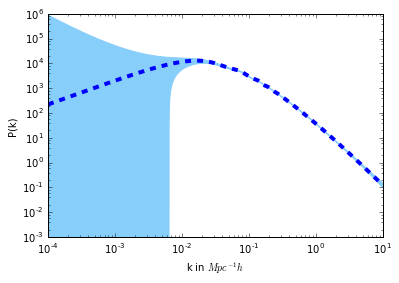

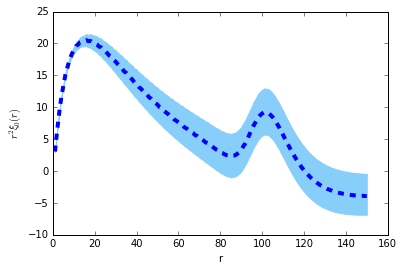

In [13]:
##part to add sample variance and shot noise

%matplotlib inline
import sys, platform, os
from matplotlib import pyplot as plt
import numpy as np
#uncomment this if you are running remotely and want to keep in synch with repo changes
#if platform.system()!='Windows':
#    !cd $HOME/git/camb; git pull github master; git log -1
print('Using CAMB installed at '+ os.path.realpath(os.path.join(os.getcwd(),'..')))
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))

import camb
from camb import model, initialpower

import scipy.integrate as integrate
import scipy.special as special
from scipy.interpolate import interp1d


pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.set_dark_energy() #re-set defaults
pars.InitPower.set_params(ns=0.965)
#Not non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[ 0.55], kmax=10.0)

#Linear spectra
#pars.NonLinear = model.NonLinear_none
#Non-Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=10, npoints = 5000)
s8 = np.array(results.get_sigma8())

print len(pk[0,:])
##These 3 quantities are the key-values for the P(k) modifications

NGpc = 100

Density = .0005 ###in Num/(Mpc.h^-1)^3
Volume = NGpc*1000.**3 ## in (Mpc.h^-1)^3    (that's the units for power spectrum)
Bias = 2.

nbk = len(kh)
tab_dk = np.zeros(nbk)

tab_dk[:-1] = kh[1:] - kh[:-1]
tab_dk[nbk -1] =tab_dk[nbk-2]
#plt.semilogx(kh, tab_dk)
#plt.show()

tab_den = np.arange(1,5)*0.0005

#tab_err = np.zeros((nb_den, nbk))

#for i in range(0, len()): tab_err[i,:] = 2.*np.pi*np.sqrt(1./(np.power(kh,2)*tab_dk*Volume ))*(1.+ 1./(Density*pk[0,:]))
tab_err = 2.*np.pi*np.sqrt(1./(np.power(kh,2)*tab_dk*Volume ))*(1.+ 1./(Density*pk[0,:]))

#plt.loglog(kh, pk[0,:])
#plt.loglog(kh, tab_err)
#plt.show()

#plt.loglog(kh, pk[0,:])
#plt.loglog(kh, pk[0,:]*(1+tab_err) )
#plt.show()


#plt.loglog(kh, tab_err)

###Part ton calculate the corelation function


nbb=150
tab_bins = np.arange(1,nbb+1)

print tab_bins

kstart = 0
kcut = 10
kcut_ind = np.argmin( abs(kh - kcut))

xi = np.zeros(nbb)
xi_err_min = np.zeros(nbb)
xi_err_max = np.zeros(nbb)

pk_err_max = pk[0,:]*(1+tab_err)
pk_err_min = np.maximum(np.zeros(nbk), pk[0,:]*(1-tab_err))


plt.fill_between(kh, pk_err_min+0.001, pk_err_max,color='lightskyblue' )
plt.loglog(kh, pk[0,:], '--' ,linewidth='4', color='blue' )
#plt.title(r'For V='+str(NGpc)+'$(Gpc/h)^3$')
plt.xlabel('k in $Mpc^{-1}h$')
plt.ylabel('P(k)')
plt.show()


factor = np.power(kh[kstart:kcut_ind],2) * pk[0,kstart:kcut_ind] / (kh[kstart:kcut_ind]*2*np.pi**2)
factor_err_max = np.power(kh[kstart:kcut_ind],2) * pk_err_max[kstart:kcut_ind] / (kh[kstart:kcut_ind]*2*np.pi**2)
factor_err_min = np.power(kh[kstart:kcut_ind],2) * pk_err_min[kstart:kcut_ind] / (kh[kstart:kcut_ind]*2*np.pi**2)
for i in range(0, nbb):
        IntegrandXi0 = factor * np.sin(kh[kstart:kcut_ind]*tab_bins[i]) / tab_bins[i]
        xi[i] = np.trapz(IntegrandXi0,kh[kstart:kcut_ind])
        IntegrandXi0_err_min = factor_err_min * np.sin(kh[kstart:kcut_ind]*tab_bins[i]) / tab_bins[i]
        IntegrandXi0_err_max = factor_err_max * np.sin(kh[kstart:kcut_ind]*tab_bins[i]) / tab_bins[i]
        xi_err_min[i] = np.trapz(IntegrandXi0_err_min,kh[kstart:kcut_ind])
        xi_err_max[i] = np.trapz(IntegrandXi0_err_max,kh[kstart:kcut_ind])


plt.fill_between(tab_bins,np.power(tab_bins,2)*xi_err_min, np.power(tab_bins,2)*xi_err_max, color='lightskyblue')
plt.plot(tab_bins, np.power(tab_bins,2)*xi, '--' ,linewidth='4', color='blue')
plt.xlabel('r')
plt.ylabel(r'$r^2\xi_0(r)$')
#plt.plot(tab_bins, np.power(tab_bins,2)*xi_err, '--', color='green')
plt.show()

